In [13]:
import numpy as np
import netCDF4 as nc
import glob
import os
from PIL import Image
from os import listdir, getcwd
from os.path import isdir, join, dirname, split
from impdar.lib.plot import plot_traces, plot_radargram
from impdar.lib import load, process
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
def is_present(var_name, variables): 
    for name in variables: 
        if(var_name == name):
            return True 
    return False

In [36]:
def create_filtered_radargram(file_path, file_name): 
    ds = nc.Dataset(file_path, mode='a')
    if(is_present('amplitude_high_gain', ds.variables)): 
        ds.renameVariable('amplitude_high_gain', 'amplitude')
        ds.sync()
        ds.close()
        ds = nc.Dataset(file_path, mode="a")
    if(is_present('amplitude', ds.variables)):
        ds.variables['amplitude'].matlab_size = ds.variables['amplitude'].shape[::-1]
        ds.sync()
        ds.close()
        data = load.load('mcords_nc', file_path)
        process.process(data, denoise=[True], hfilt=[0, 15], vbp=[1, 10])
        figure = plt.figure()
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plot_radargram(data[0], fig=figure)
        figure.savefig("filtered_images/"+os.path.splitext(file_name)[0]+"_FILTERED.png", bbox_inches='tight', pad_inches=0)

Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Band

<ipython-input-36-04b8faa10a8d>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure()


Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Bandpass filter complete.
Subtracting mean trace found between 0 and 15
Horizontal filter complete.
Bandpassing from  1.0 to 10.0 MHz...
Band

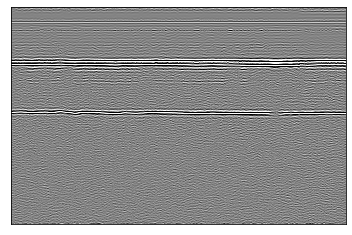

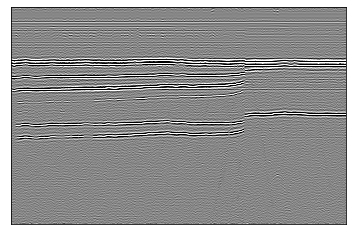

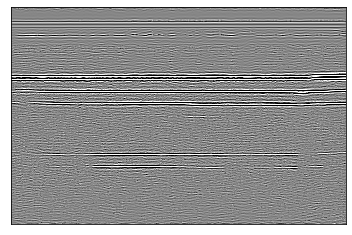

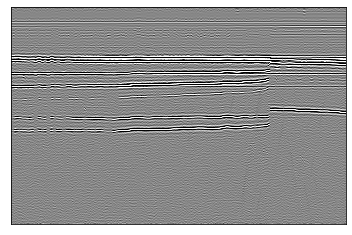

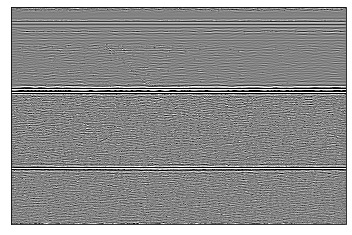

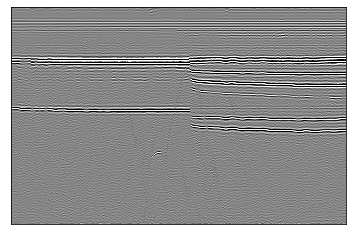

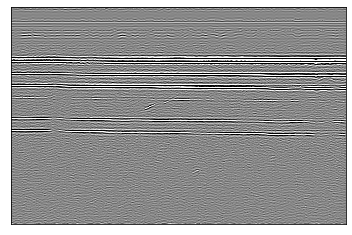

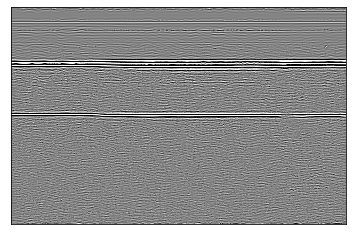

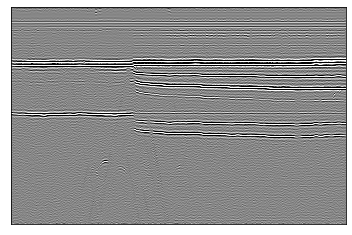

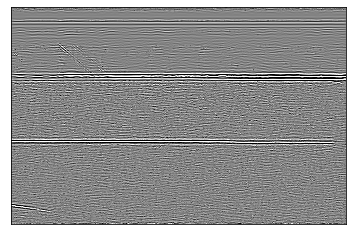

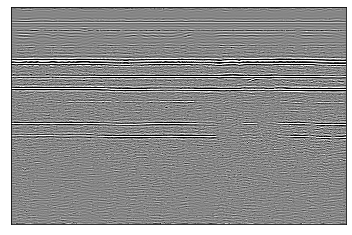

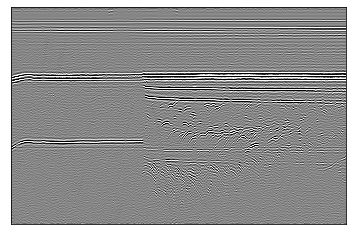

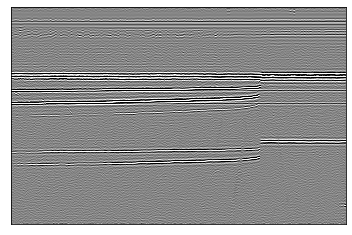

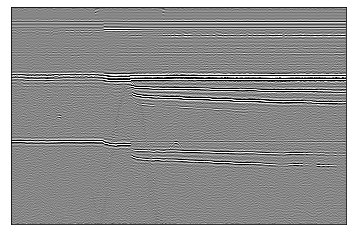

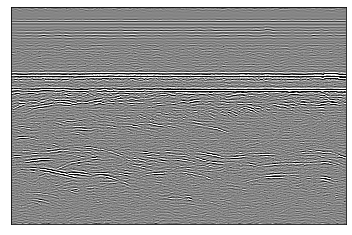

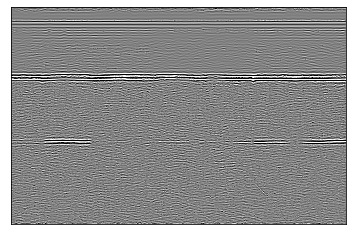

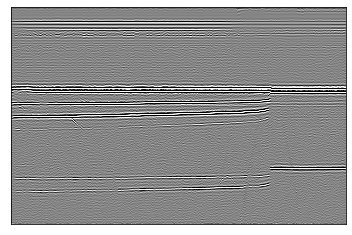

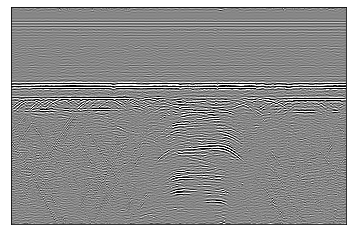

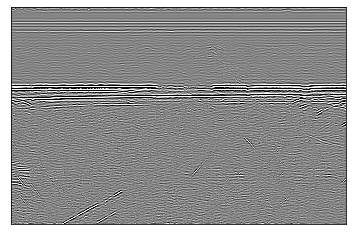

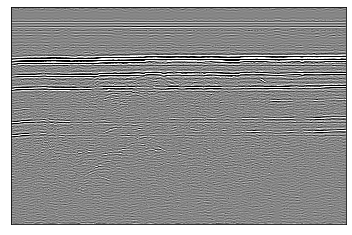

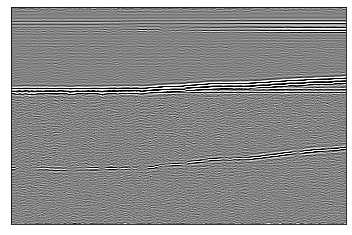

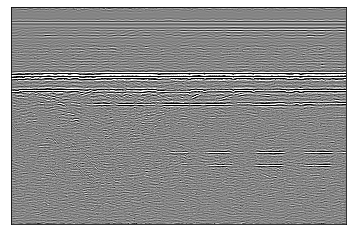

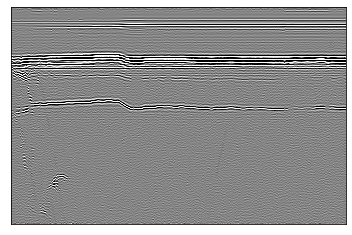

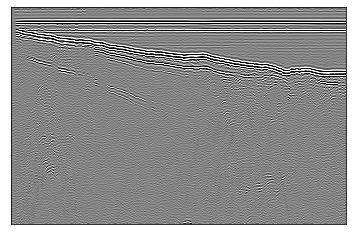

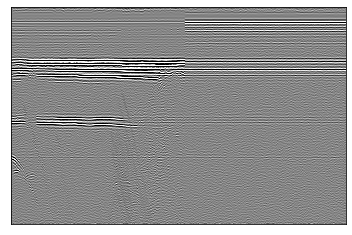

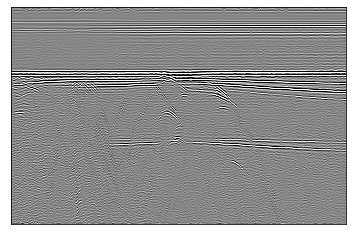

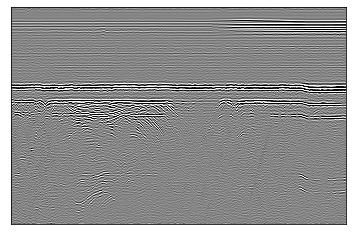

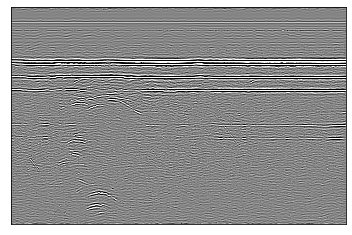

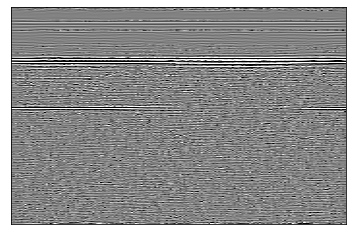

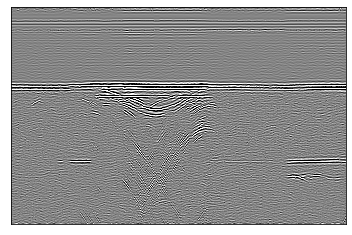

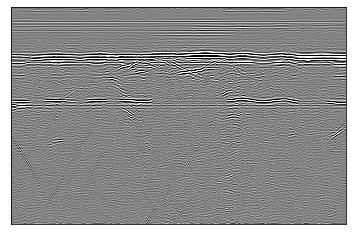

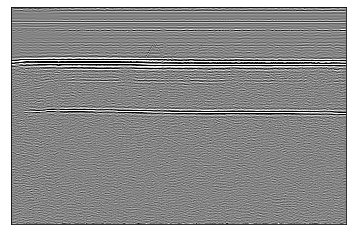

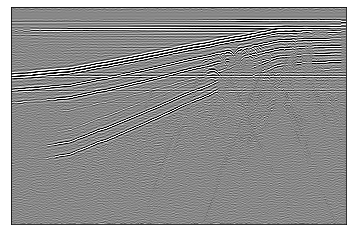

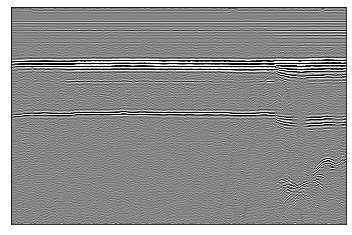

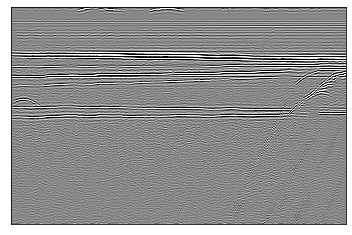

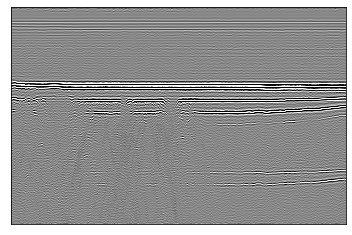

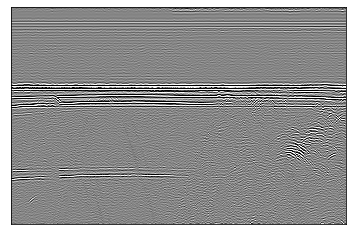

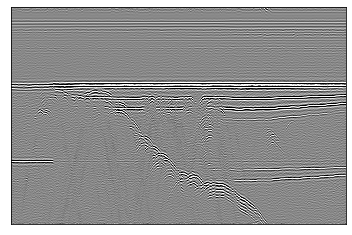

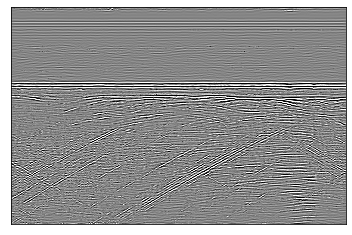

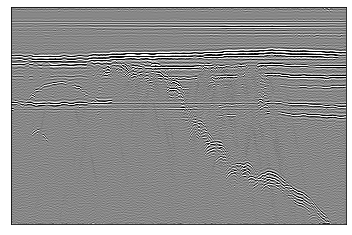

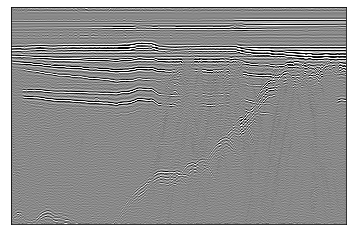

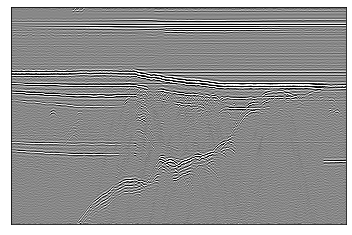

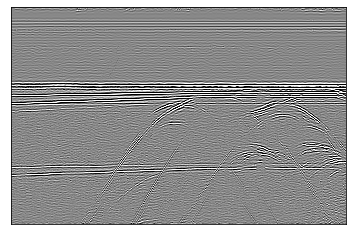

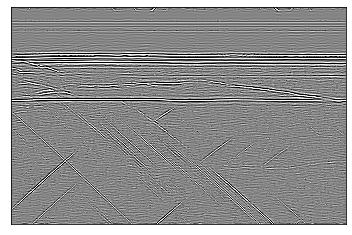

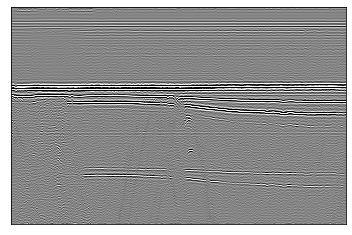

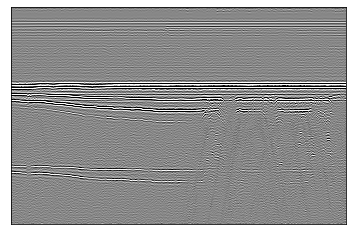

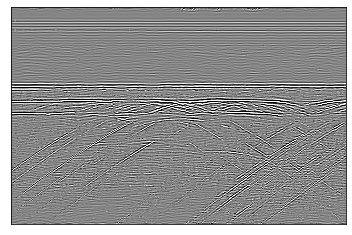

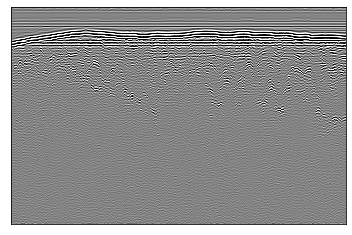

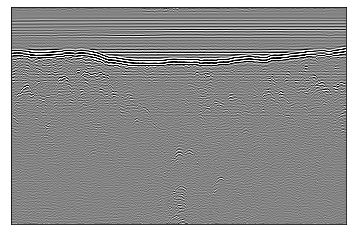

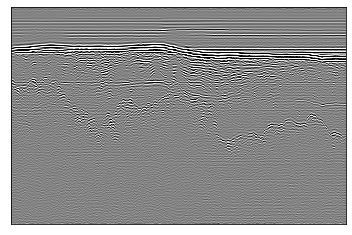

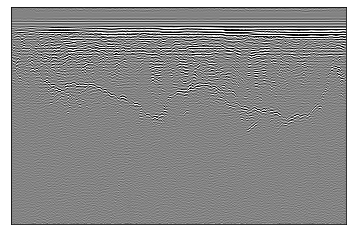

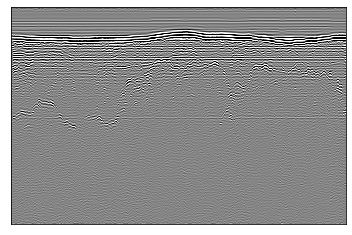

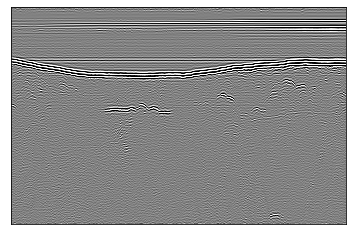

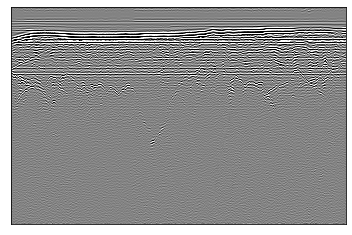

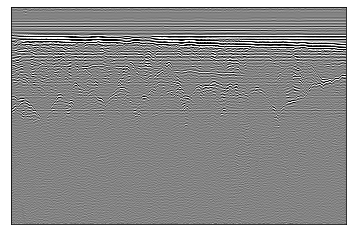

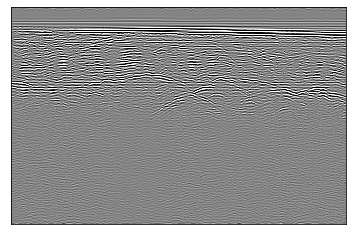

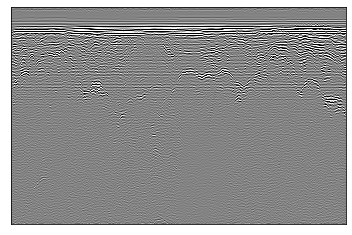

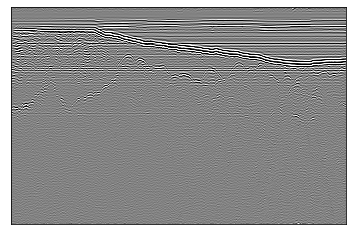

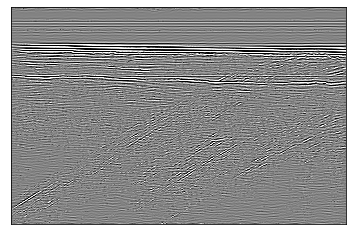

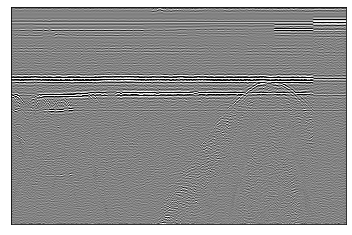

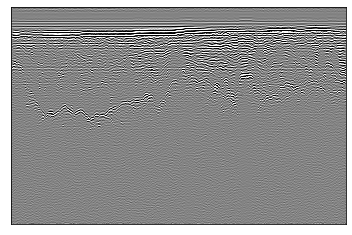

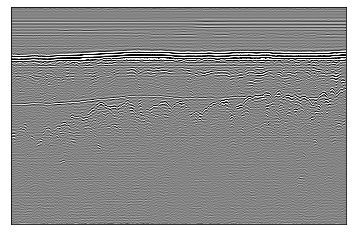

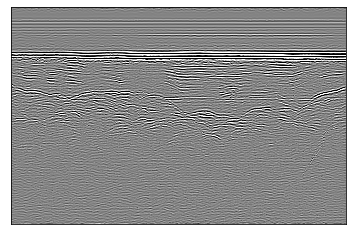

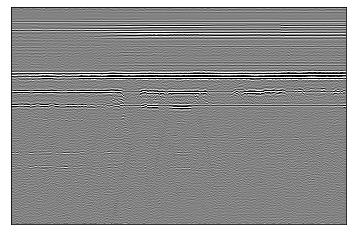

In [37]:
path = join(dirname(getcwd()),'data')
dirs = listdir(path)
for folder in dirs:
    tmp_path = join(path, folder)
    if isdir(tmp_path):
        files = listdir(tmp_path)
        for file in files:
            if file.endswith(".nc"):
                create_filtered_radargram(join(tmp_path, file), file)